# I 
Suppose a non-life insurance company has responsibility for a portfolio of $J = 1, 000$ policies. Assume further that the number of claims $N$ is Poisson distributed with intensity $μ = 0.05$, and that the claim sizes $Z$ i follow a Pareto with $E(Z_i) = 1.9$ and $sd(Z_i) = 2, 3, 4.$
## Ia) 
__Q:__ Find the parameters $\alpha$ and $\beta$ of the Pareto distribution for each of the three values of $sd(Z_i)$ and plot the probabilitydensity function of each of the three distributions. <br>

__A:__ We use the method of moments. We have given empirical values for the mean and standard deviation. For the Pareto distribution we know that

\begin{align}
    E(Z) = \xi(\alpha, \beta) = \frac{\beta}{\alpha -1}\\
    sd(Z) = \sigma (\alpha, \beta) = E(Z) \sqrt{\frac{\alpha}{\alpha -2}}
\end{align}

Now we match our empirical values, which I will name as $\overline{z}$ and $s$ for the mean and std, with the theoetical values from above

\begin{align}
    \frac{\beta}{\alpha -1}= \overline{Z} \\
    \frac{\beta}{\alpha -1} \sqrt{\frac{\alpha}{\alpha -2}} &= s
\end{align}

These are two equations in two unknown. Solving for the two unknowns gives

\begin{align}
    \alpha &= \frac{2}{1-(\frac{\overline{z}}{s})^2} \\
    \beta &= \frac{2}{1-(\frac{\overline{z}}{s})^2} \overline{z}
\end{align}

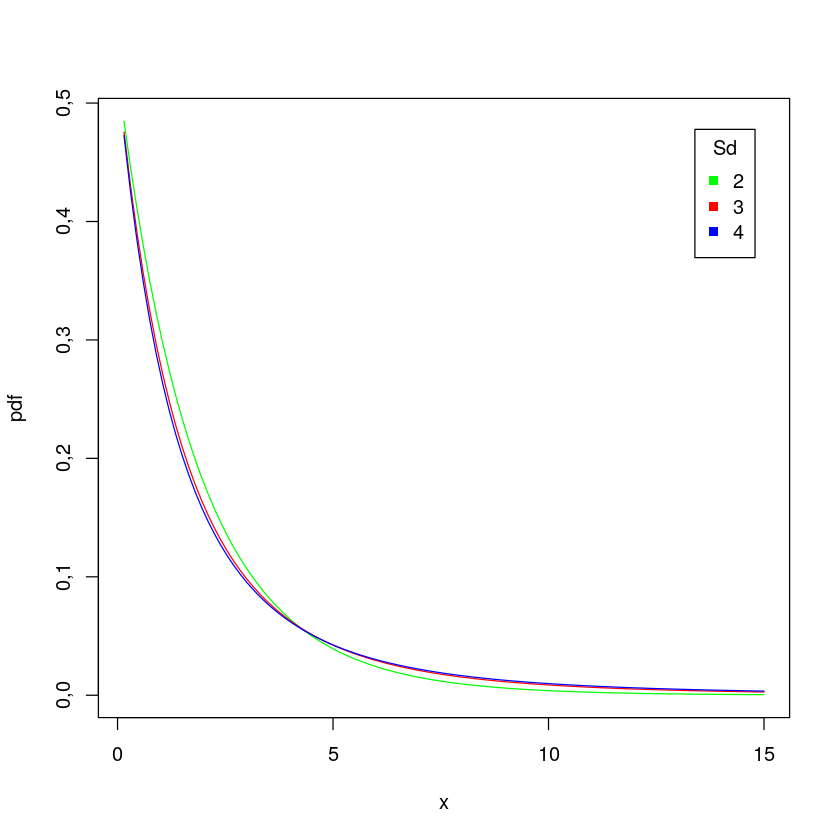

In [29]:
J = 1000
mean = 1.9
sds = c(2,3,4)


pdfPareto = function(mean, sd, x){
    alpha = 2/(1-(mean/sd)^2)
    beta = alpha*mean
    f = (alpha/beta)/(1 + x/beta)^(alpha + 1)
    return(list(alpha, beta, f))
}

colors <- c("green", "red", "blue")
x = 1:100*.15
counter = 1
for (sd in sds){
    out = pdfPareto(mean, sd, x)
    pdf = unlist(out[3])
    if (counter == 1){
        plot(x, pdf, 'l', col=colors[counter])
    }
    else{
        lines(x, pdf, col=colors[counter])
    }
    counter = counter + 1
}
legend("topright", inset=.05, title="Sd", legend=sds, pch=15, col = colors);


Higher std gives more tail weight.

## Ib)
__Q:__ Compute the 95% and 99% reserve for this portfolio for each of the three
sets of parameters.<br>

__A:__

[1] "numSd/exact"          "4,53105513389734e-06" "numMean/exact"       
[4] "10,0000030569896"    
[1] "qEpsilon"         "2,69743641037239" "2,69743641037239"
[1] "numSd/exact"      "6,90101166362341" "numMean/exact"    "9,99428760172226"
[1] "qEpsilon"         "3160,65691619278" "3222,50634409602"


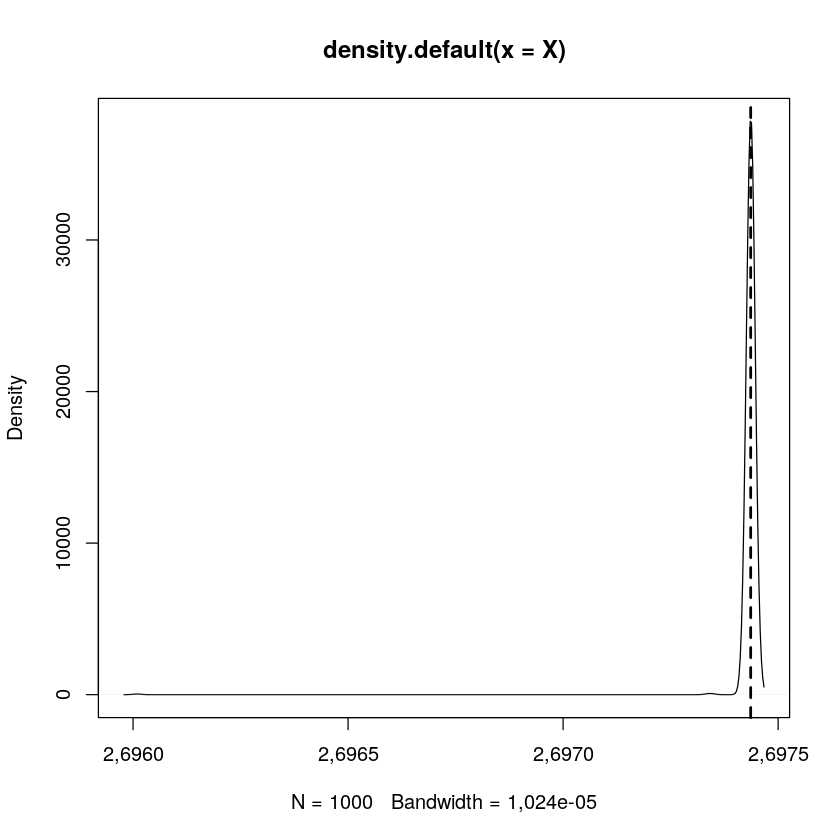

[1] "numSd/exact"          "4,10140558167374e-05" "numMean/exact"       
[4] "9,9999978535232"     
[1] "qEpsilon"         "10,7331515130537" "10,7331515130537"


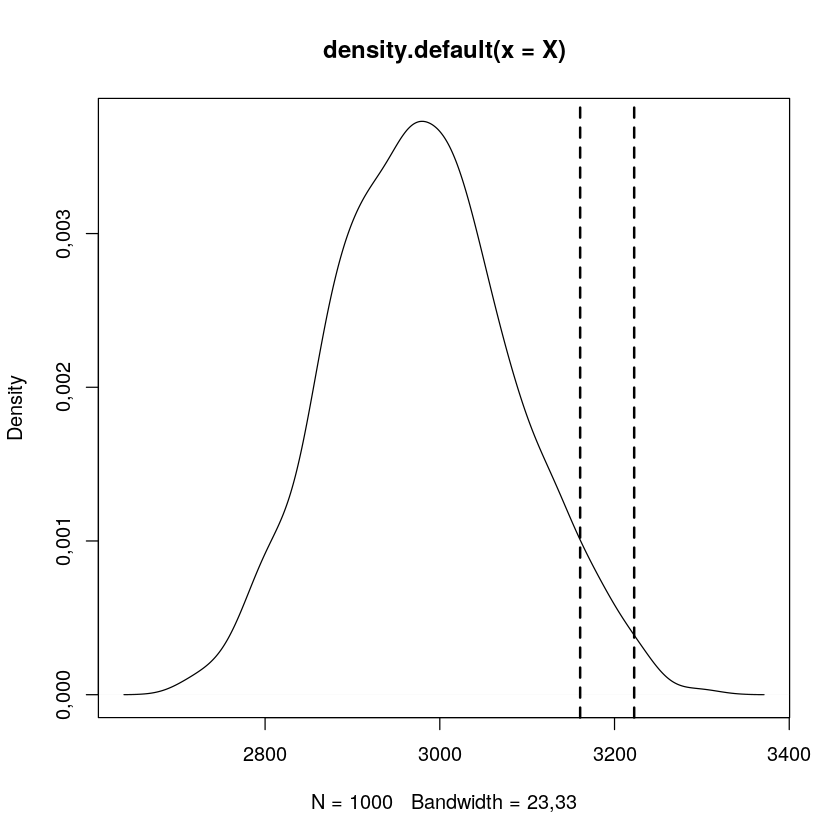

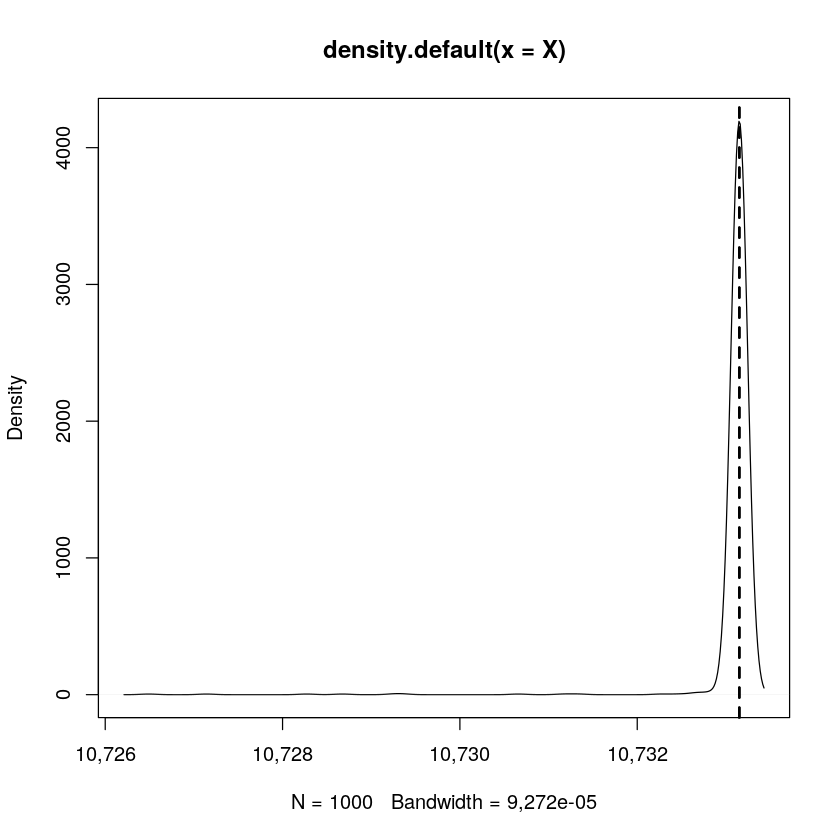

In [42]:
portFolioRisk = function(m, lambda, alpha, beta){
    X = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        U = runif(m)
        Z = beta*(U**(-1/alpha) - 1)
        X[i] = sum(Z)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    exactE = m*lambda*1*beta/(alpha - 1)
    #exactSd = (m*lambda*1*(beta^2/(alpha - 1)^2 + beta^2/(alpha-1)^2*alpha/(alpha-2)))^.5
    exactSd = sqrt(m*lambda*1*(2*alpha - 2)/(alpha - 2))
    print(c('numSd/exact',numericalSd/exactSd, 'numMean/exact',numericalMean/exactE))
    return(list(numericalMean, numericalSd, X))
}

m = 1000
lambda = .1

alphaBeta = function(mean, sd){
    alpha = 2/(1-(mean/sd)^2)
    beta = alpha*mean
    return(list(alpha, beta))
}

for (sd in sds){
    out = alphaBeta(mean, sd)
    alpha = unlist(out[1])
    beta = unlist(out[2])    
    out = portFolioRisk(m, lambda, alpha, beta)
    mean = unlist(out[1])
    sd = out[2]
    X = unlist(out[3])

    epsilon = c(0.05, 0.01)
    qEpsilon = sort(X)[(1-epsilon)*m]
    #qEpsilonToMean = qEpsilon/mean
    #print(c('qEpsilon/mean', qEpsilonToMean))
    print(c('qEpsilon', qEpsilon))
    plot(density(X))
    abline(v = qEpsilon[1], lty=2, lwd=2)
    abline(v = qEpsilon[2], lty=2, lwd=2)
}